In [1]:
# Written by: Sheekar Banerjee, AI Engineering Lead

import tensorflow as tf
import cv2
from matplotlib import pyplot as plt
import numpy as np

In [2]:
img = cv2.imread('/content/Y13.jpg')

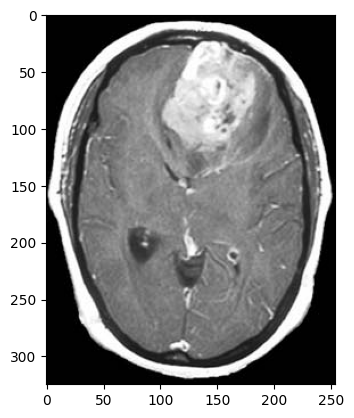

In [3]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

In [4]:
aug = tf.image.random_saturation(
    img, 
    lower=0.1, 
    upper=1)

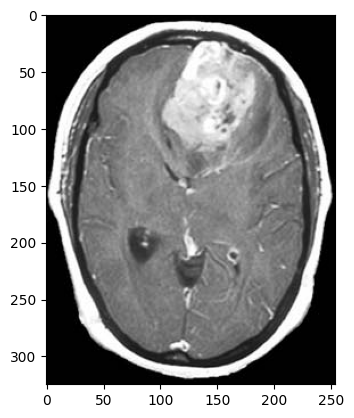

In [5]:
plt.imshow(cv2.cvtColor(aug.numpy(), cv2.COLOR_BGR2RGB))
plt.show()

In [21]:
# Creating Augmentation Pipeline
def aug_flow(img):
    data = []
    for i in range(9):
        img = tf.image.random_brightness(img, max_delta=0.02)
        img = tf.image.random_contrast(img, lower=0.6, upper=1)
        img = tf.image.random_flip_left_right(img)
        img = tf.image.random_jpeg_quality(img, min_jpeg_quality=90, max_jpeg_quality=100)
        img = tf.image.random_saturation(img, lower=0.9,upper=1)

        data.append(img)
    return data

In [22]:
aug_images = aug_flow(img)

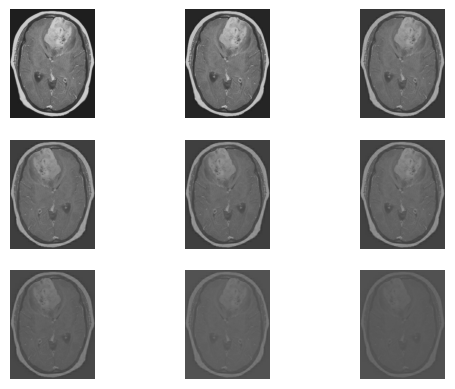

In [23]:
for idx, aug_img in enumerate(aug_images):
    plt.subplot(3,3,idx+1)
    bgr = cv2.cvtColor(aug_img.numpy(), cv2.COLOR_BGR2RGB)
    plt.imshow(bgr)
    plt.axis("off")